### ! Wichtig
Datei 'Databereinigung' bearbeitet Datensätze low_income.xls, lower_middle_income.xls, upper-middle-income.xls, high_income.xls und speichert Dataframes mit entfernten Ausreisser als 'csv', die in diesem Notebook benutzt werden.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

In [2]:
df_low = pd.read_csv('df_low.csv')
df_lower_middle = pd.read_csv('df_lower_middle.csv')
df_upper_middle = pd.read_csv('df_upper_middle.csv')
df_high = pd.read_csv('df_high.csv')



## Datenvollständigkeit

##### Heatmap zeigt Datenvollständigkeit und mit Rot sind fehlende Daten markiert.

Shape: (280, 12)



,Country Code,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,BFA,Burkina Faso,2010,9.088720e+09,1.864628e+09,2.595501e+09,6.506940e+09,1.314004e+09,3.494542e+07,100.000000,3.723,NaN
1,BFA,Burkina Faso,2011,9.690627e+09,2.538508e+09,3.033336e+09,6.657084e+09,1.384464e+09,1.153906e+08,102.759767,3.827,NaN
2,BFA,Burkina Faso,2012,1.031593e+10,2.743840e+09,3.573492e+09,7.131905e+09,1.470493e+09,2.704280e+08,106.683292,3.856,NaN
3,BFA,Burkina Faso,2013,1.091349e+10,2.955044e+09,4.033502e+09,7.804933e+09,1.599436e+09,3.980879e+08,107.252702,4.055,NaN
4,BFA,Burkina Faso,2014,1.138570e+10,3.066397e+09,3.631077e+09,7.995326e+09,1.761912e+09,2.917644e+08,106.975894,4.251,NaN


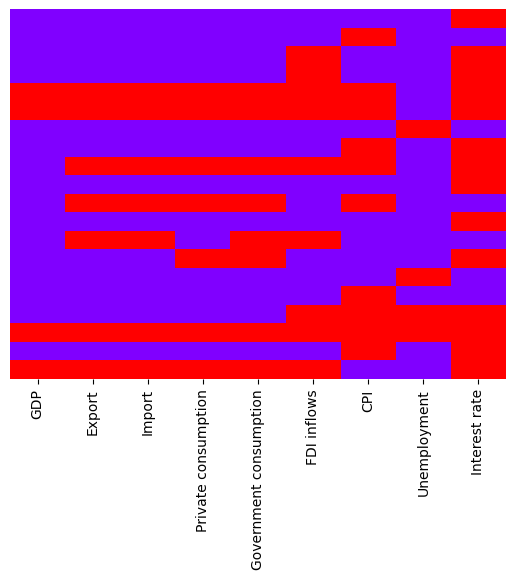

In [3]:
sns.heatmap(df_low.iloc[:,3:].isnull(), yticklabels=False, cbar=False, cmap='rainbow')
print('Shape:', df_low.shape)
print()
df_low.head()

Shape: (616, 12)



,Country Code,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,AGO,Angola,2010,NaN,NaN,3.089485e+10,2.597353e+10,NaN,NaN,NaN,16.618,NaN
1,AGO,Angola,2011,NaN,NaN,2.951410e+10,2.551245e+10,NaN,NaN,NaN,16.770,NaN
2,AGO,Angola,2012,NaN,NaN,2.922176e+10,2.885478e+10,NaN,NaN,NaN,16.562,NaN
3,AGO,Angola,2013,NaN,NaN,3.084481e+10,3.211743e+10,NaN,NaN,NaN,16.492,NaN
4,AGO,Angola,2014,NaN,NaN,3.105305e+10,3.986466e+10,NaN,NaN,NaN,16.406,NaN


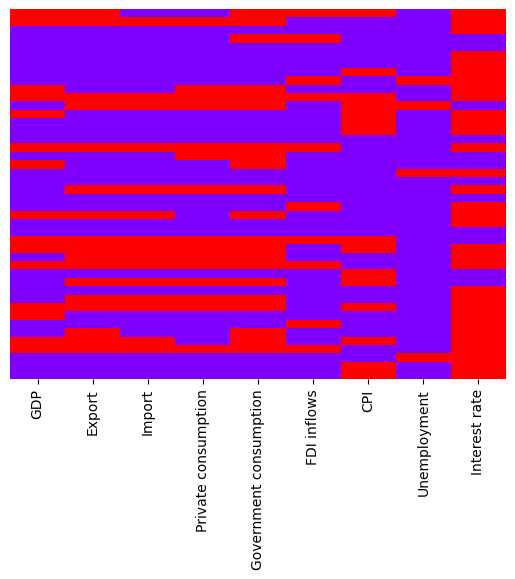

In [4]:
sns.heatmap(df_lower_middle.iloc[:,3:].isnull(), yticklabels=False, cbar=False, cmap='rainbow')
print('Shape:', df_lower_middle.shape)
print()
df_lower_middle.head()

Shape: (714, 12)



,Country Code,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,ALB,Albania,2010,1.042021e+10,2.915516e+09,5.060466e+09,8.139156e+09,1.162620e+09,9.522124e+08,100.000000,14.086,7.971037
1,ALB,Albania,2011,1.068545e+10,3.124589e+09,5.553978e+09,8.366644e+09,1.172639e+09,8.692969e+08,103.429123,13.481,9.888462
2,ALB,Albania,2012,1.083688e+10,3.135922e+09,5.155400e+09,8.449181e+09,1.175240e+09,8.074947e+08,105.530382,13.376,9.736112
3,ALB,Albania,2013,1.094547e+10,3.165027e+09,5.139709e+09,8.759593e+09,1.206792e+09,1.074439e+09,107.575160,15.866,9.510397
4,ALB,Albania,2014,1.113969e+10,3.142842e+09,5.257361e+09,8.999464e+09,1.275703e+09,9.683779e+08,109.324187,18.055,6.324558


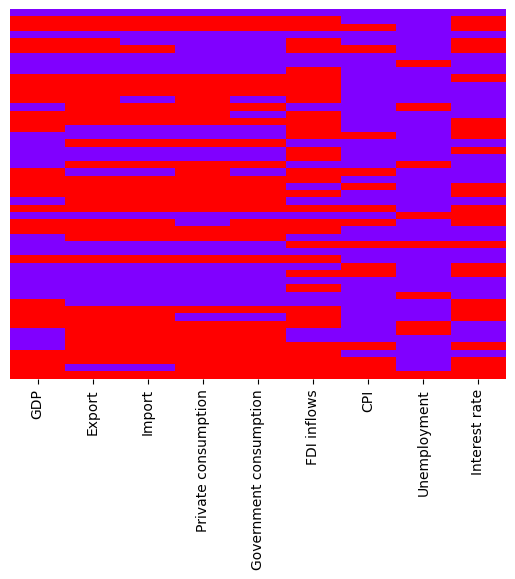

In [5]:
sns.heatmap(df_upper_middle.iloc[:,3:].isnull(), yticklabels=False, cbar=False, cmap='rainbow')
print('Shape:', df_upper_middle.shape)
print()
df_upper_middle.head()

Shape: (896, 12)



,Country Code,Country Name,Time,GDP,Export,Import,Private consumption,Government consumption,FDI inflows,CPI,Unemployment,Interest rate
0,ATG,Antigua and Barbuda,2010,1.376434e+09,NaN,NaN,NaN,NaN,9.936640e+07,100.000000,NaN,9.245397
1,ATG,Antigua and Barbuda,2011,1.349474e+09,NaN,NaN,NaN,NaN,7.333378e+07,103.456750,NaN,10.177754
2,ATG,Antigua and Barbuda,2012,1.394989e+09,NaN,NaN,NaN,NaN,1.312184e+08,106.950360,NaN,9.945285
3,ATG,Antigua and Barbuda,2013,1.386610e+09,NaN,NaN,NaN,NaN,9.717311e+07,108.083497,NaN,9.430504
4,ATG,Antigua and Barbuda,2014,1.417274e+09,NaN,NaN,NaN,NaN,4.755300e+07,109.261004,NaN,8.148533


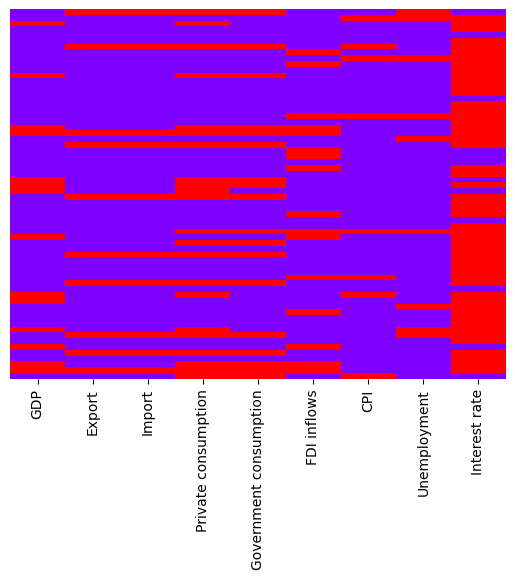

In [6]:
sns.heatmap(df_high.iloc[:,3:].isnull(), yticklabels=False, cbar=False, cmap='rainbow')
print('Shape:', df_high.shape)
print()
df_high.head()

## Lineare Regressionen

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

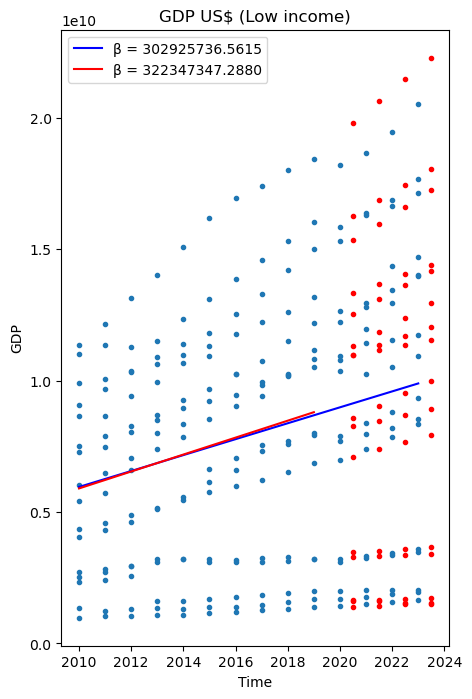

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

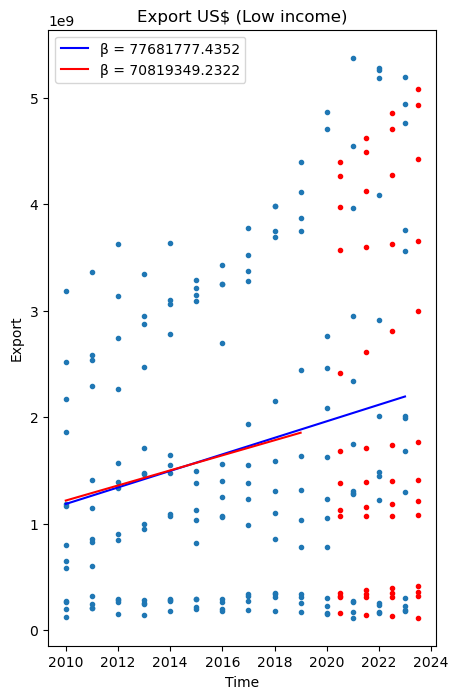

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

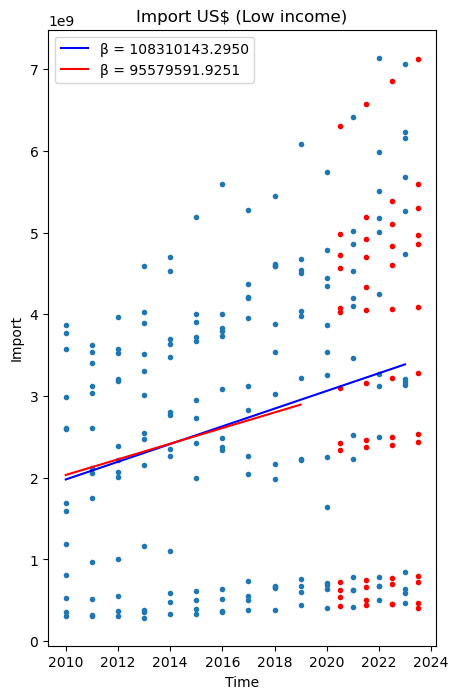

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

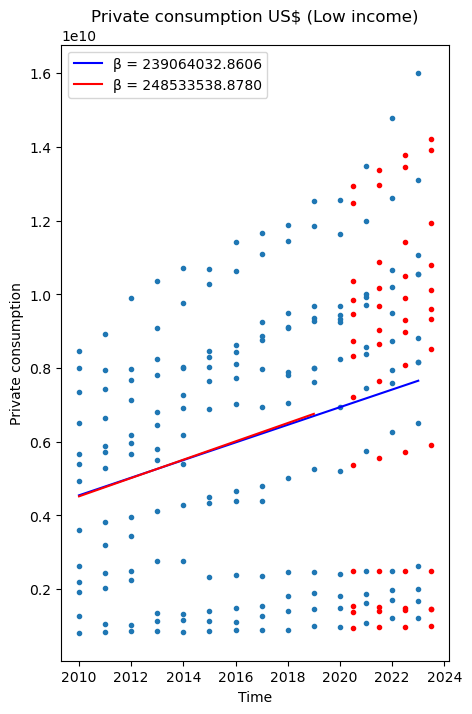

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

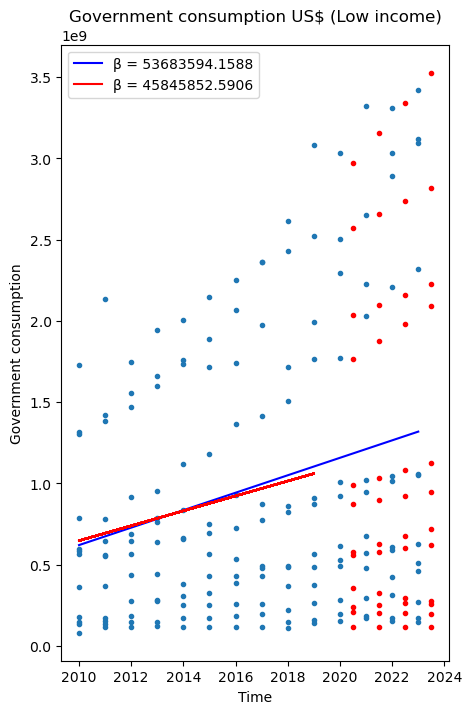

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

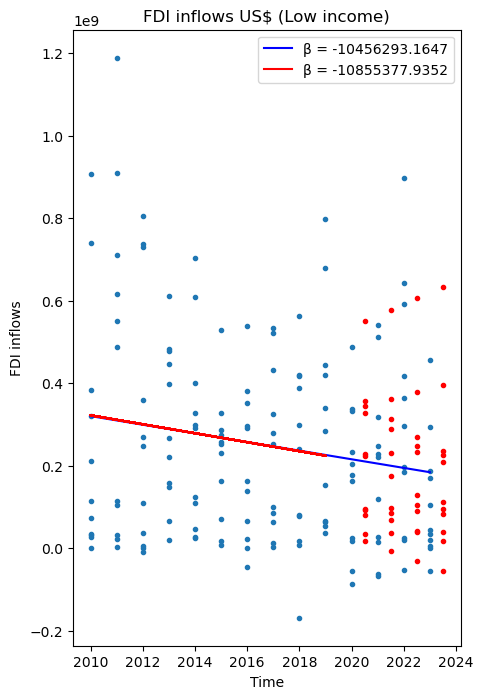

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

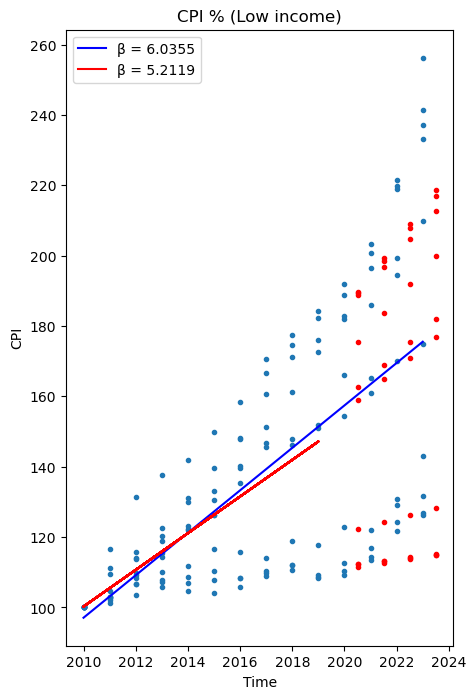

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

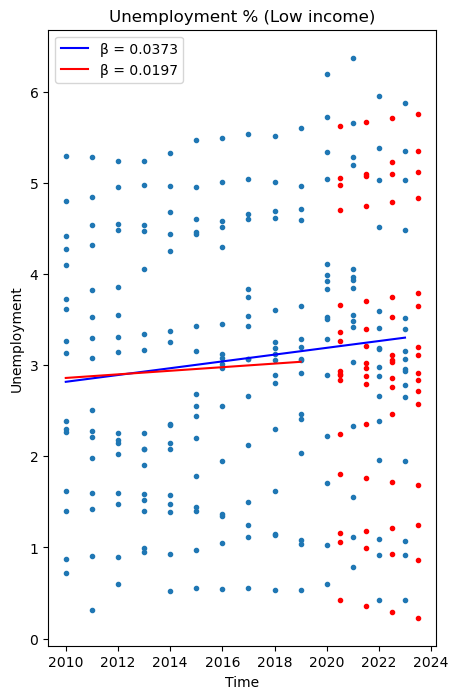

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

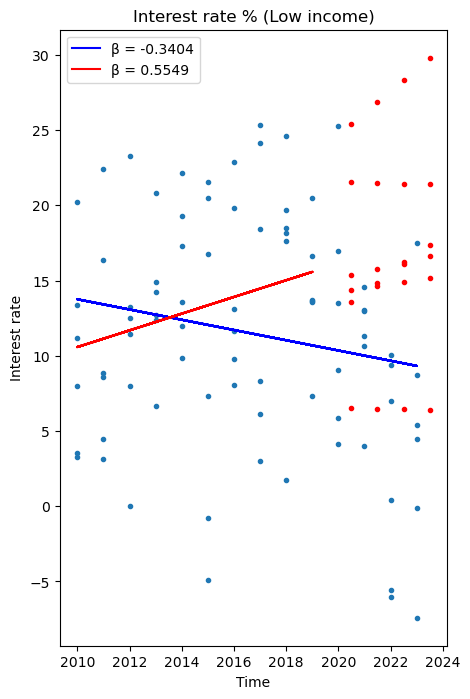

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

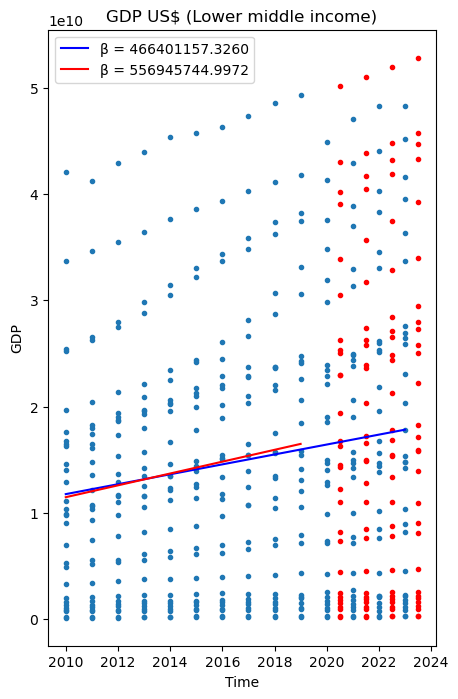

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

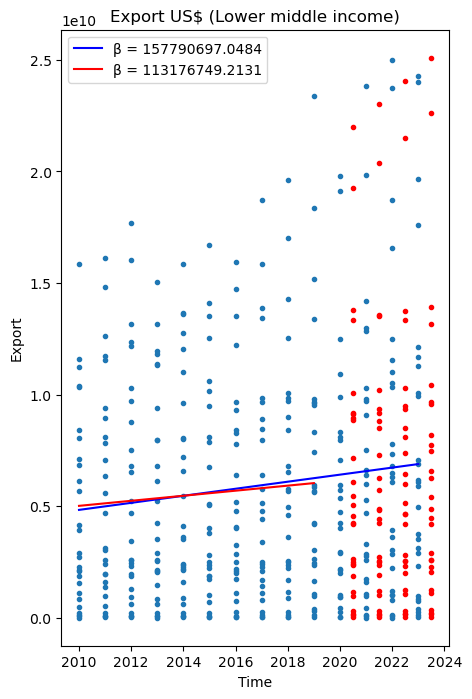

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

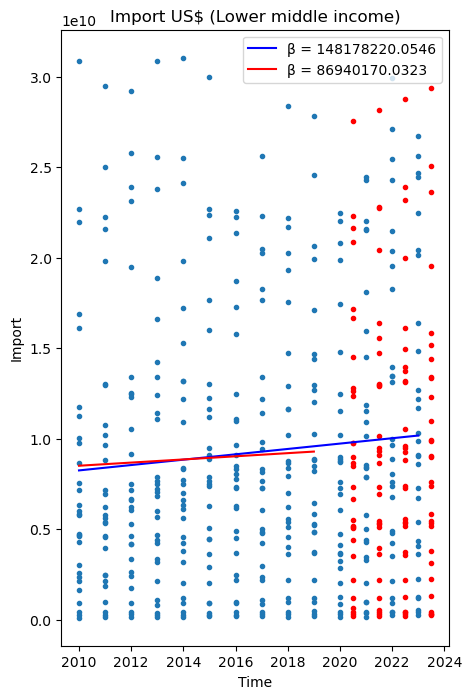

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

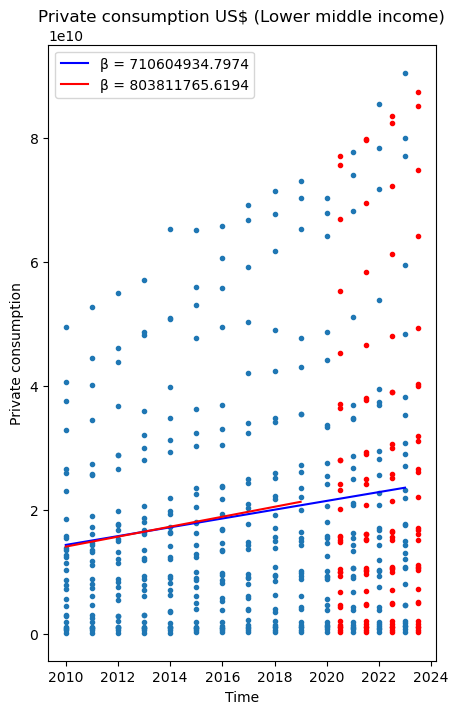

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

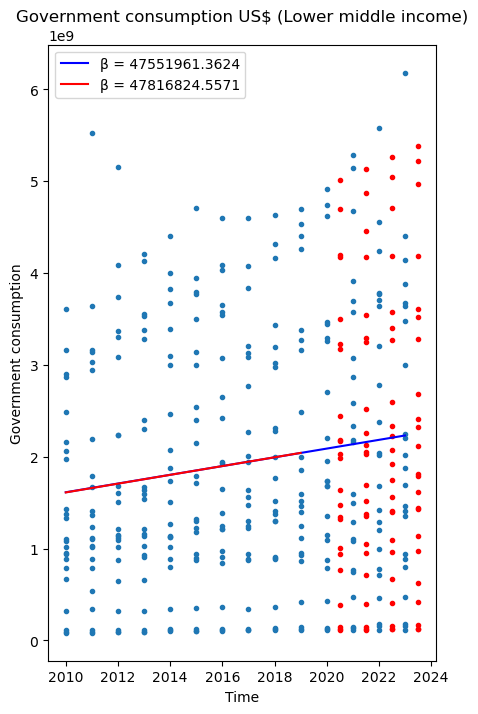

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

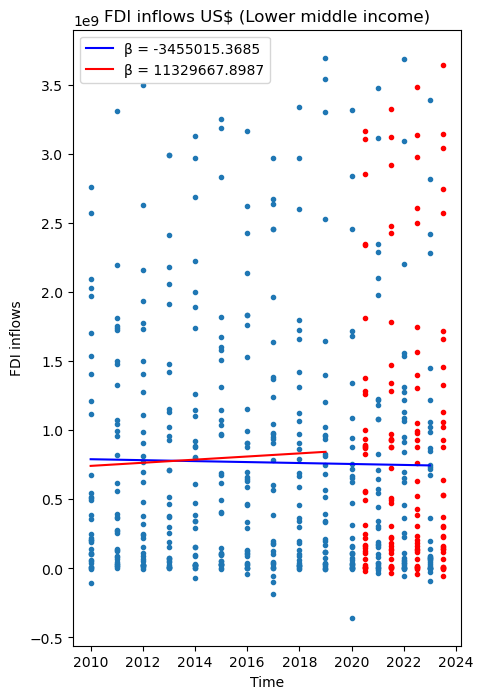

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

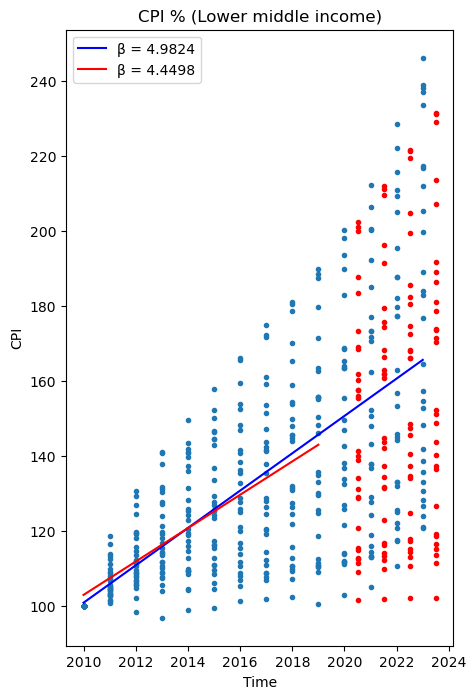

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

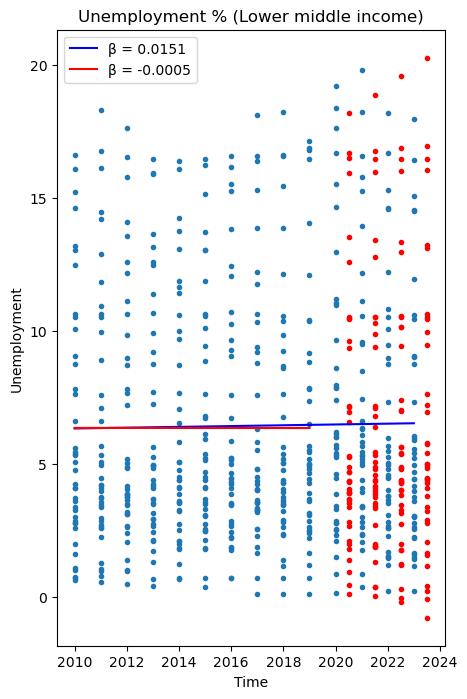

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

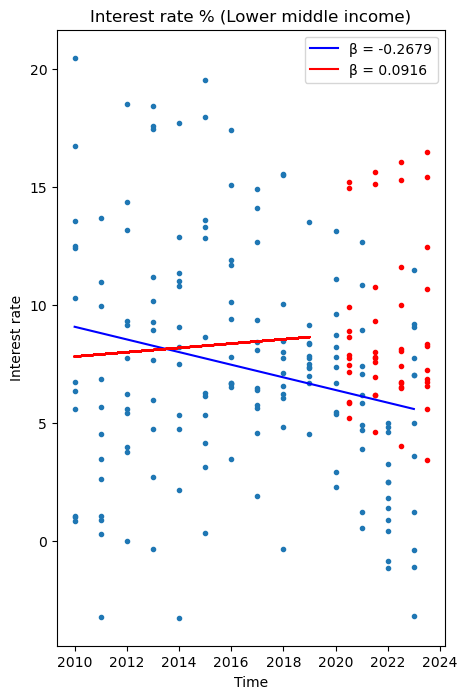

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

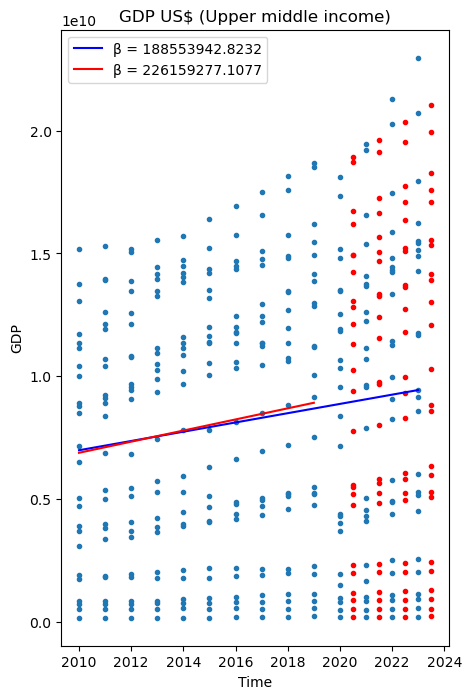

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

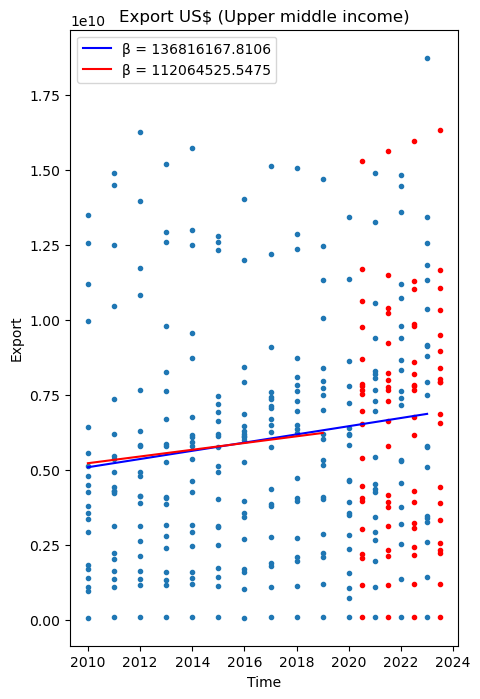

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

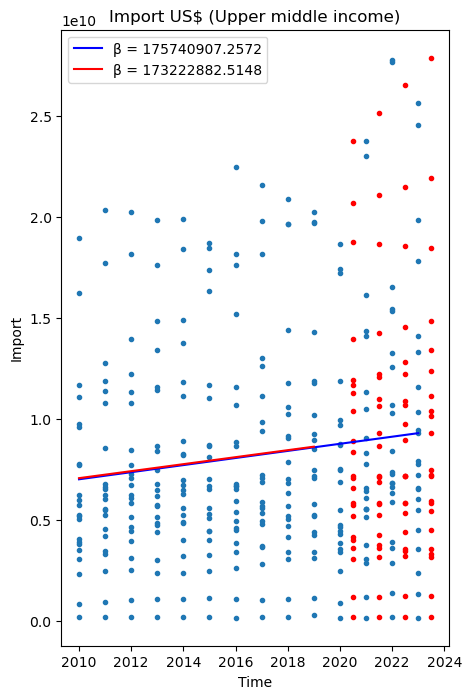

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

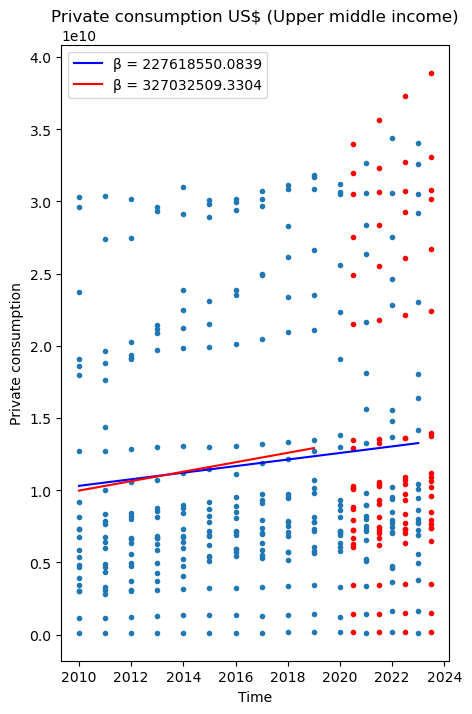

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

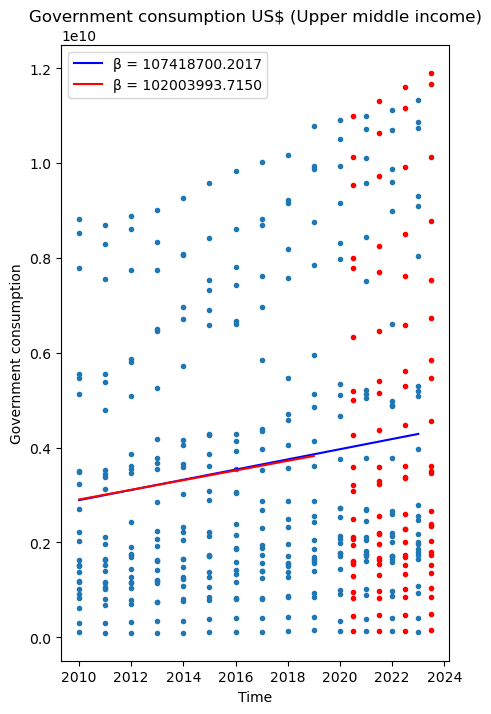

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

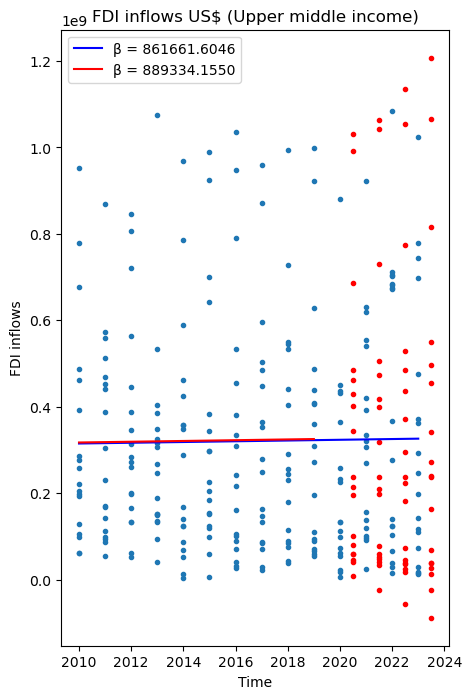

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

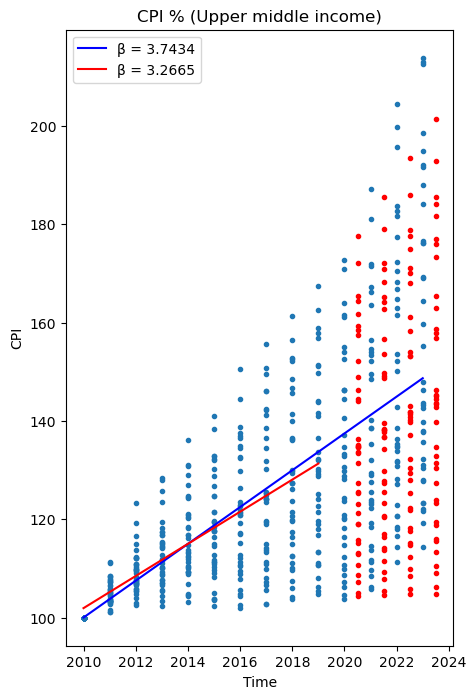

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

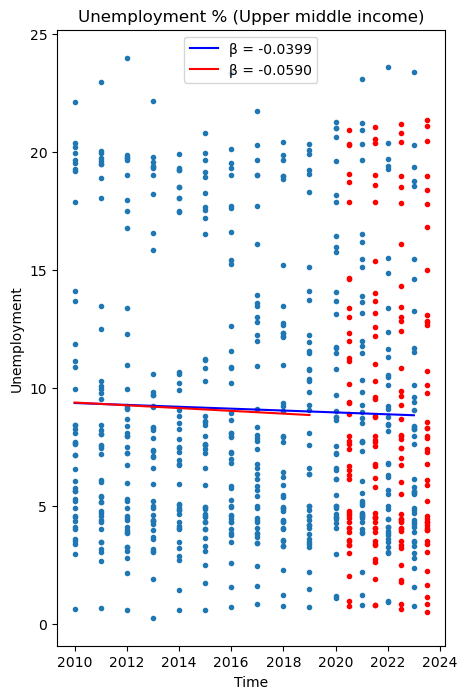

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

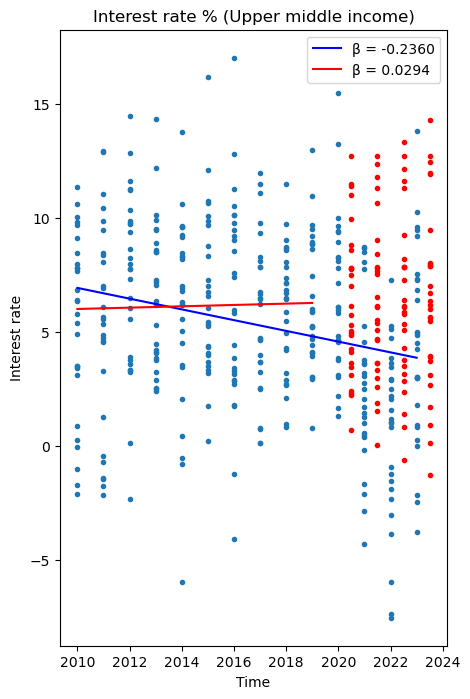

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

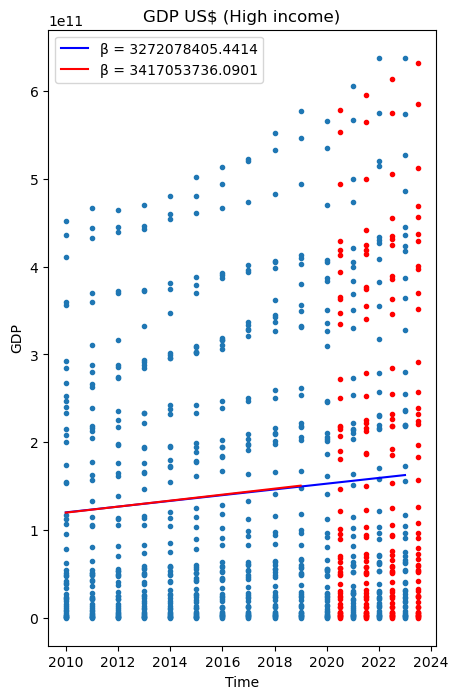

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

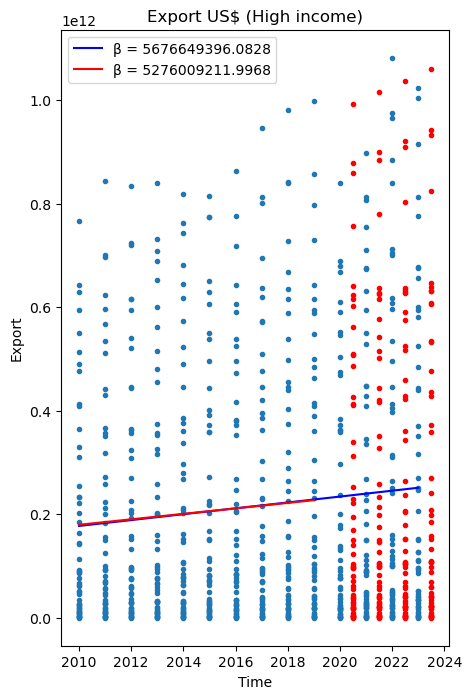

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

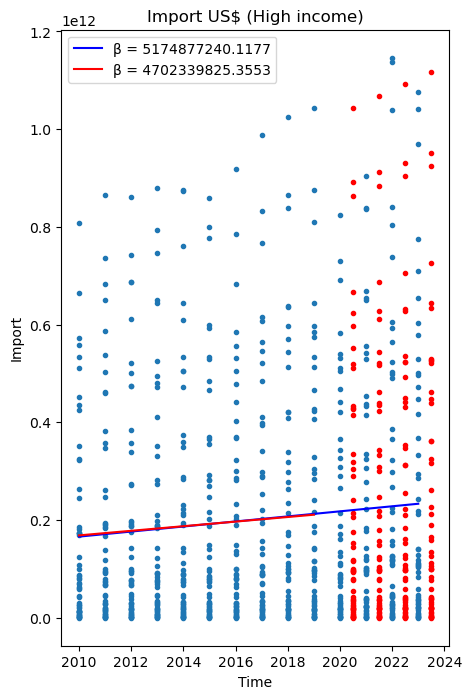

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

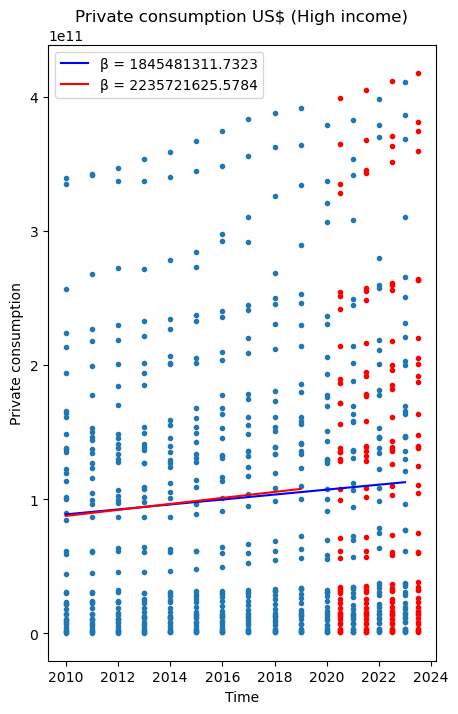

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

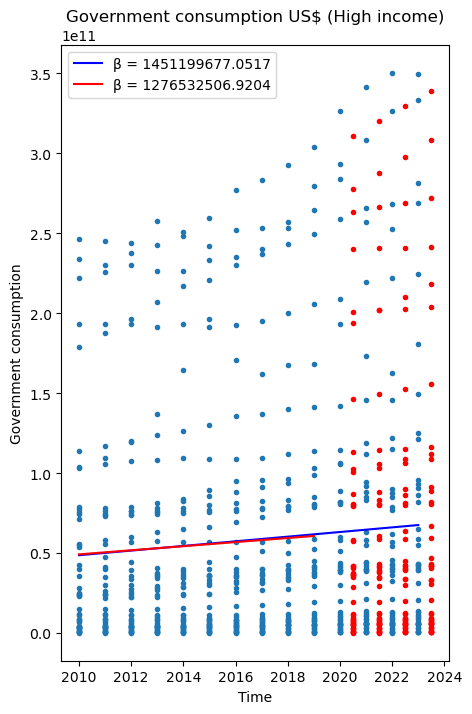

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

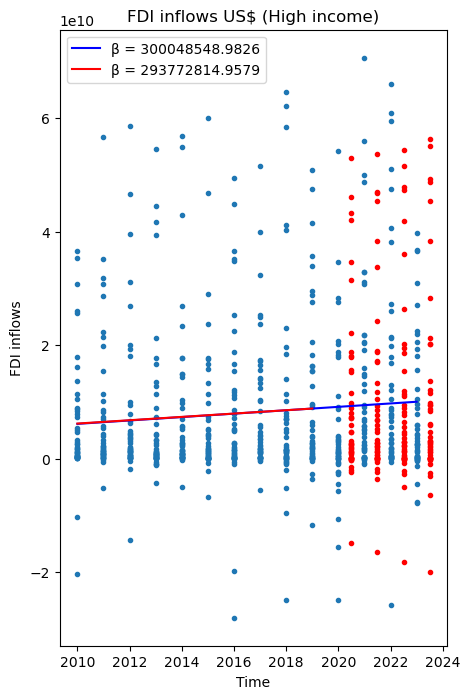

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

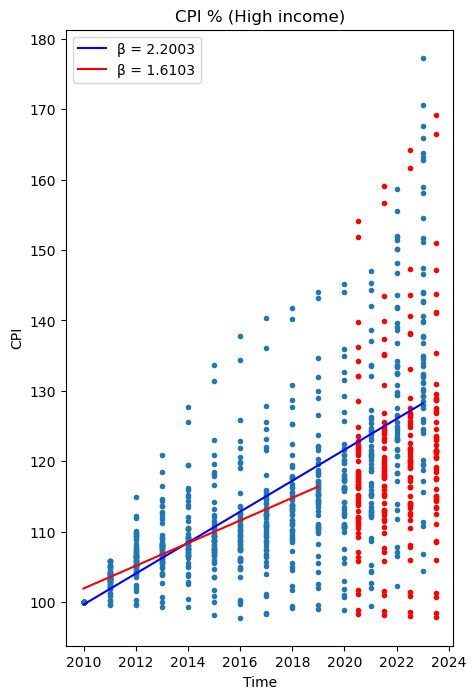

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

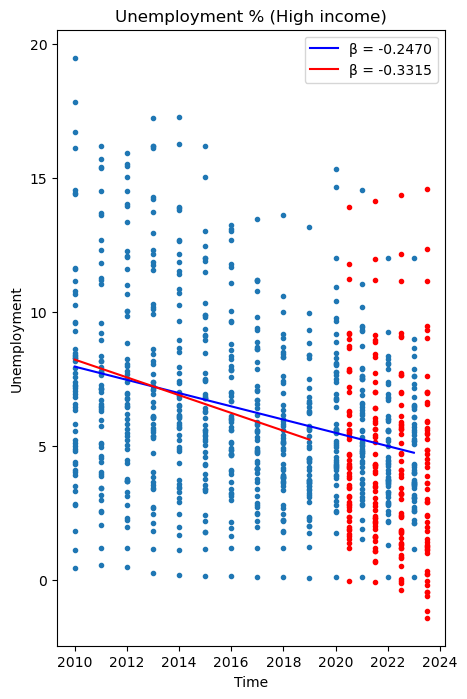

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2023.append(float(lr.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  koef_2019.append(float(lr_bevore.coef_))
C:\Users\HP\AppData\Local\Temp\ipykernel_9028\2961417790.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {flo

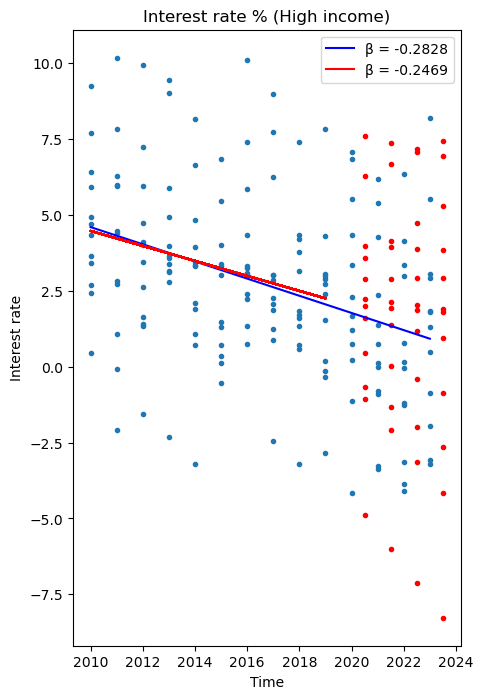

In [7]:
# Diese Funktion hilft zu unterscheiden, ob gegebenes Jahr for oder nach Corona liegt.
def create_class(row):
    if row.Time < 2020:
        return 0
    else:
        return 1

# Diese Funktion hilft einen Indikator für Jahr (0-13) zu erstellen um dann für Lineare Regression als X anzuwenden. 
def create_year(row):
    year = list(range(2010, 2024))
    for i,e in enumerate(year):
        if row.Time == e:
            return i

dataframes = [df_low, df_lower_middle, df_upper_middle, df_high]
titels = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']   # wird für Visualisierungstitel benötigt
dimentions = ['US$', 'US$', 'US$', 'US$', 'US$', 'US$', '%', '%', '%']   # wird für Visualisierungstitel benötigt
index_number = -1   # wird für Visualisierungstitel benötigt, um Länder Gruppe aus Liste 'titels' mit Index zu wählen

# Diese Koeffizienten werdern gespeichert um später ein Heatmap als Zusammenfassung über alle Länder Gruppen zu erstellen.
all_koef_2023 = []
all_koef_2019 = []

# For-schleife für gleiche bearbeitung von 4 Datensätzen für 4 Gruppen Länder.
for df in dataframes:

    index_number +=1
    koef_2023 = []
    koef_2019 = []

    df['Class'] = df.apply(create_class, axis=1)   # Spalte 'Class' mit Werten 0 für Jahren vor Corona (2010-2019) und Werten 1 nach Corona (2020-2023)
    df['Year indicator'] = df.apply(create_year, axis=1)   # Spalte 'Year indicator' mit Werten 0-13 entsprechend Jahren 2010-2023, um in der lineare Regresion als X anzuwenden.
    
    # For-schleife für gleiche bearbeitung von Indikatoren
    for i in df.columns[3:12]:
        
        # Lineare Regression für ganzes Zeitraum 2010-2023 über alle Länder für bestimmten Indikator
        df_lr = df[['Country Name', 'Time', i, 'Year indicator']]
        df_lr = df_lr.dropna()
        X = np.array(df_lr[['Year indicator']])
        y = np.array(df_lr[i])
        lr = LinearRegression()
        lr.fit(X, y)
        y_pred = lr.predict(X)

        # Lineare Regression für Zeitraum vor Corona 2010-2019 über alle Länder für bestimmten Indikator
        df_lr_bevore = df_lr[df_lr['Time']<2020] 
        X_bevore = np.array(df_lr_bevore[['Year indicator']])
        y_bevore = np.array(df_lr_bevore[i])
        lr_bevore = LinearRegression()
        lr_bevore.fit(X_bevore, y_bevore)
        y_pred_bevore = lr_bevore.predict(X_bevore)
        
        koef_2023.append(float(lr.coef_))
        koef_2019.append(float(lr_bevore.coef_))
        
        # Lineare Regressionen für einzelne Länder für Zeitraum 2010-2019 für bestimmten Indikator und dann Vorhersagen für Zeitraum 2020-2023
        list_y_pred_country = []
        for c in df_lr['Country Name'].unique():
            
            df_country_all = df_lr[df_lr['Country Name']==c]
            df_country = df_country_all[df_country_all['Time']<2020] 
            X_country = np.array(df_country[['Year indicator']])
            y_country = np.array(df_country[i])
            lr_country = LinearRegression()
            lr_country.fit(X_country, y_country)
            
            df_country_after = df_country_all[df_country_all['Time']>=2020] 
            X_country_after = np.array(df_country_after[['Year indicator']])
            y_pred_country = lr_country.predict(X_country_after)
            list_y_pred_country.append(y_pred_country)
    
        
        plt.figure(figsize=(5,8))
        plt.scatter(df_lr['Time'], y, marker='.')   # Datensatz
        plt.plot(df_lr['Time'], y_pred, color = 'blue', label=f'β = {float(lr.coef_):.4f}')   # Regressionslinie 2010-2023
        plt.plot(df_lr_bevore['Time'], y_pred_bevore, color = 'red', label=f'β = {float(lr_bevore.coef_):.4f}')   # Regressionslinie 2010-20
        plt.xlabel('Time')
        plt.ylabel(i)
        plt.legend()
        plt.title(f'{i} {dimentions[list(df.columns[3:12]).index(i)]} ({titels[index_number]})')
    
        # Vorhersagenvisualisierung für einzelne Länder als Punkte für 2020-2023
        x_time = df_country_after['Time'].apply(lambda x: x+0.5)   # Vorhergesagte Punkte werden um 0.5 Jahr verschoben, um besser von echten Datenpunkten zu unterscheiden
        for i in list_y_pred_country:
            plt.scatter(x_time, i, color = 'red', marker='.')
    
        plt.show()
        print()

    all_koef_2023.append(koef_2023)
    all_koef_2019.append(koef_2019)


## Regressionskoeffizienten

In [8]:
till_2023 = pd.DataFrame(all_koef_2023, index = [['Low income', 'Lower middle income', 'Upper middle income', 'High income']], columns = df_low.columns[3:12]).transpose()
till_2019 = pd.DataFrame(all_koef_2019, index = [['Low income', 'Lower middle income', 'Upper middle income', 'High income']], columns = df_low.columns[3:12]).transpose()

In [9]:
till_2023   # ganzes Zeitraum

,Low income,Lower middle income,Upper middle income,High income
GDP,3.029257e+08,4.664012e+08,1.885539e+08,3.272078e+09
Export,7.768178e+07,1.577907e+08,1.368162e+08,5.676649e+09
Import,1.083101e+08,1.481782e+08,1.757409e+08,5.174877e+09
Private consumption,2.390640e+08,7.106049e+08,2.276186e+08,1.845481e+09
Government consumption,5.368359e+07,4.755196e+07,1.074187e+08,1.451200e+09
FDI inflows,-1.045629e+07,-3.455015e+06,8.616616e+05,3.000485e+08
CPI,6.035457e+00,4.982385e+00,3.743384e+00,2.200308e+00
Unemployment,3.729863e-02,1.505780e-02,-3.991156e-02,-2.469933e-01
Interest rate,-3.403738e-01,-2.678851e-01,-2.359832e-01,-2.827689e-01


In [10]:
till_2019   # vor Corona

,Low income,Lower middle income,Upper middle income,High income
GDP,3.223473e+08,5.569457e+08,2.261593e+08,3.417054e+09
Export,7.081935e+07,1.131767e+08,1.120645e+08,5.276009e+09
Import,9.557959e+07,8.694017e+07,1.732229e+08,4.702340e+09
Private consumption,2.485335e+08,8.038118e+08,3.270325e+08,2.235722e+09
Government consumption,4.584585e+07,4.781682e+07,1.020040e+08,1.276533e+09
FDI inflows,-1.085538e+07,1.132967e+07,8.893342e+05,2.937728e+08
CPI,5.211899e+00,4.449822e+00,3.266525e+00,1.610341e+00
Unemployment,1.969318e-02,-5.300000e-04,-5.899625e-02,-3.315417e-01
Interest rate,5.549491e-01,9.155583e-02,2.937298e-02,-2.469233e-01


##### Berechnung der prozentuellen Änderung der Steigungskoeffizienten (koef. für ganzes Zeitraum gegen koef. vor Corona).

(β_2023 – β_2019) / |β_2019| * 100 %


In [11]:
koef_countries = []
for i, e in enumerate(all_koef_2019):
    koef_variables = []
    for ii, ee in enumerate (e):
        new_koef = (all_koef_2023[i][ii] - ee) / abs(ee)
        koef_variables.append(new_koef)
    koef_countries.append(koef_variables)

final_results = pd.DataFrame(koef_countries, index = [['Low income', 'Lower middle income', 'Upper middle income', 'High income']], columns = df_low.columns[3:12]).transpose()
#final_results = pd.DataFrame(koef_countries, index = [['LI', 'LMI', 'UMI', 'HI']], columns = df_low.columns[3:12]).transpose()    # für Presentation damit Heatmap kompakter wird
final_results

,Low income,Lower middle income,Upper middle income,High income
GDP,-0.060251,-0.162573,-0.166278,-0.042427
Export,0.096900,0.394197,0.220870,0.075936
Import,0.133193,0.704370,0.014536,0.100490
Private consumption,-0.038102,-0.115956,-0.303988,-0.174548
Government consumption,0.170959,-0.005539,0.053083,0.136829
FDI inflows,0.036764,-1.304953,-0.031116,0.021363
CPI,0.158015,0.119682,0.145984,0.366362
Unemployment,0.893987,29.410948,0.323490,0.255016
Interest rate,-1.613342,-3.925921,-9.034022,-0.145169


<Axes: xlabel='None'>

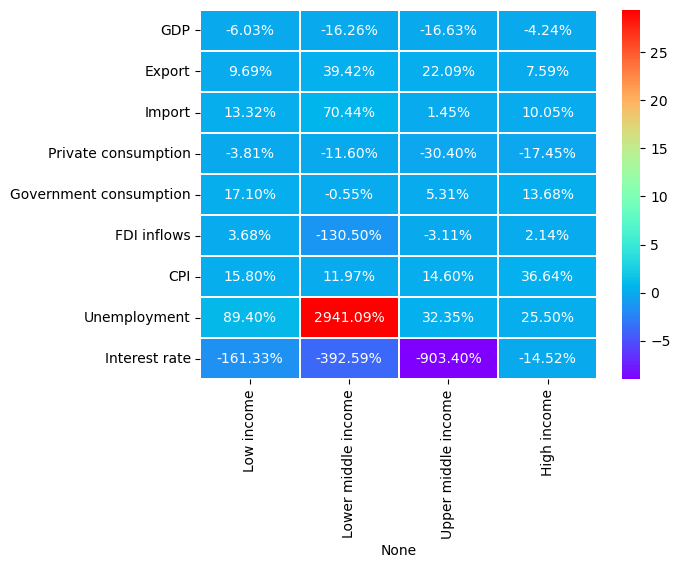

In [12]:
sns.heatmap(final_results, cmap='rainbow', annot = True, fmt='.2%', linewidth=0.2)